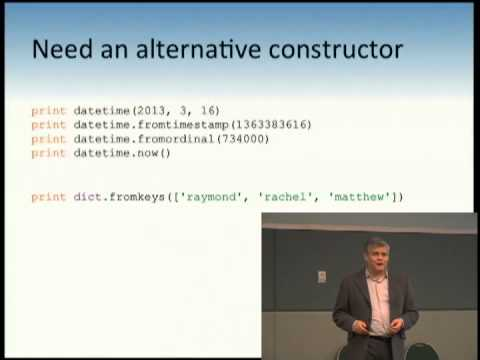

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('HTLu2DFOdTg', width=600, height=500)

### Version 0.1

In [2]:
import math

class Circle:
    """An advanced circle analytic toolkit"""
    
    version = '0.1'  # class variable
    
    def __init__(self, radius):
        """init isn't a constructor. 
        Its job is to initialize the instance variables.
        
        self is the instance.
        """
        self.radius = radius   # instance variable
        
    def area(self):
        return math.pi * self.radius ** 2.0

In [3]:
Circle.version

'0.1'

In [8]:
c = Circle(1.0)
c.area(), c.radius

(3.141592653589793, 1.0)

In [7]:
c.version

'0.1'

In [13]:
from random import random, seed

seed(1)
n = 10
circles = [Circle(random()) for i in range(n)]
avg = sum([c.area() for c in circles]) / n
avg

0.9074109732305086

### Version 0.2

In [14]:
import math

class Circle:
    """An advanced circle analytic toolkit.
    Add perimeter method.
    """
    
    version = '0.2'  # class variable
    
    def __init__(self, radius):
        """init isn't a constructor. 
        Its job is to initialize the instance variables.
        
        self is the instance.
        """
        self.radius = radius   # instance variable
        
    def area(self):
        return math.pi * self.radius ** 2.0
    
    def perimeter(self):
        return 2 * math.pi * self.radius

In [16]:
c2 = Circle(1)
c2.version, c2.radius, c2.area(), c2.perimeter()

('0.2', 1, 3.141592653589793, 6.283185307179586)

In [23]:
c2.radius *= 10
c2.radius

10.0

In [24]:
c2.version, c2.radius, c2.area(), c2.perimeter()

('0.2', 10.0, 314.1592653589793, 62.83185307179586)

### Subclass Tire

In [29]:
import math

class Tire(Circle):
    """Tires are Circles with a corrected perimeter"""
    
    def perimeter(self):
        """Circumference corrected for the rubber"""
        return Circle.perimeter(self) * 10.0

In [30]:
t = Tire(1)
t.version, t.radius, t.area(), t.perimeter()

('0.2', 1, 3.141592653589793, 62.83185307179586)

### Class methods are to create alternative constructors

Background:

```python
bbd = 25.1
c = Circle(bbd_to_radius(bbd))
```

It's awkward, so we add a method in class Circle.

Key Ideas:

* **class method** is a method of the class, no need to create an instance to use the class method.
* **class variable** is a variable of the class, no need to create an instance to use the class variable.

In [53]:
class Circle:
    """"""
    
    version = '0.4'   # class variable
    
    def __init__(self, radius):
        self.radius = radius
    
    def area(self):
        return math.pi * self.radius ** 2
    
    def perimeter(self):
        return 2 * math.pi * self.radius
    
    @classmethod   
    # you have to add @classmethod to make a method to be a class method, which is like class variable
    def alternative_constructor(cls, val):
        """Construct a Circle with 100 times val"""
        radius = val * -1.0
        return Circle(radius)

In [54]:
# classs method
Circle.alternative_constructor(1.0)

In [55]:
# class variable
Circle.version

'0.4'

Can subclass use the classmethod?

In [56]:
class Tire(Circle):
    
    def perimeter(self):
        return Circle.perimeter(self) * 10.0 

In [57]:
Tire.alternative_constructor(1.0)

The problem is that it returns a class Circle, not Tire.

In [58]:
t = Tire.alternative_constructor(1.0)
t

In [59]:
t.perimeter()

-6.283185307179586

The instance `t` is still using Circle.perimeter(), not Tire.perimeter().

Let's modify the class method shown as belows.

In [60]:
class Circle:
    """"""
    
    version = '0.4'   # class variable
    
    def __init__(self, radius):
        self.radius = radius
    
    def area(self):
        return math.pi * self.radius ** 2
    
    def perimeter(self):
        return 2 * math.pi * self.radius
    
    @classmethod   
    # you have to add @classmethod to make a method to be a class method, which is like class variable
    def alternative_constructor(cls, val):
        """Construct a Circle with 100 times val"""
        radius = val * -1.0
        return cls(radius)   # change Circel to cls

In [61]:
class Tire(Circle):
    
    def perimeter(self):
        return Circle.perimeter(self) * 10.0 

In [62]:
t = Tire.alternative_constructor(1.0)
t

Now `t` is an instance of class Tire, which is what we want.

In [63]:
t.perimeter()

-62.83185307179586

And the calucalution is also from Tire.

### Why using static methods?  Know its purpose.

Static methods attach functions to classes. You don't have to create an instance just to call a function. Static methods put functions in the right context, which is the class.

Nice,	clean call.			
No	instance is	required.			
The	correct	context	is	present.	
The	method is findable.	

In [66]:
class Circle:
    """"""
    
    version = '0.4'   # class variable
    
    def __init__(self, radius):
        self.radius = radius
    
    def area(self):
        return math.pi * self.radius ** 2
    
    def perimeter(self):
        return 2 * math.pi * self.radius
    
    @classmethod   
    # you have to add @classmethod to make a method to be a class method, which is like class variable
    def alternative_constructor(cls, val):
        """Construct a Circle with 100 times val"""
        radius = val * -1.0
        return cls(radius)   # change Circel to cls
    
    @staticmethod
    def static_func():
        return 1 + 1

In [68]:
Circle.static_func()

2

### setter, getter

In [92]:
class Circle:
    """"""
    
    version = '0.6'   # class variable
    
    def __init__(self):
        # self.radius = radius
        pass
    
    def area(self):
        return math.pi * self.radius ** 2
    
    def perimeter(self):
        return 2 * math.pi * self.radius
    
    @classmethod   
    # you have to add @classmethod to make a method to be a class method, which is like class variable
    def alternative_constructor(cls, val):
        """Construct a Circle with 100 times val"""
        radius = val * -1.0
        return cls(radius)   # change Circel to cls
    
    @staticmethod
    def static_func():
        return 1 + 1
    
    @property
    # convert dotted access to method calls
    def radius(self): 
        return self.diameter / 2.0
    
    @radius.setter
    def radius(self, radius):
        self.diameter = radius * 2.0

In [93]:
c6 = Circle()

In [94]:
c6.radius = 1.0

In [95]:
c6.diameter

2.0

In [96]:
c6.radius

1.0

In [97]:
c6.__dict__

{'diameter': 2.0}

## `__slot__`

Flyweight design pattern suppresses the instance dictionary  
[`__slots__`](https://docs.python.org/3/reference/datamodel.html#slots)


By default, instances of classes have **a dictionary for attribute storage**. The default can be overridden by defining `__slots__` in a class definition. The `__slots__` declaration takes a sequence of instance variables and reserves just enough space in each instance to hold a value for each variable. Space is saved **because `__dict__` is not created for each instance**.


In [98]:
class Circle:
    """"""
    
    version = '0.7'   # class variable
    
    __slots__ = ['diameter']
    
    def __init__(self):
        # self.radius = radius
        pass
    
    def area(self):
        return math.pi * self.radius ** 2
    
    def perimeter(self):
        return 2 * math.pi * self.radius
    
    @classmethod   
    # you have to add @classmethod to make a method to be a class method, which is like class variable
    def alternative_constructor(cls, val):
        """Construct a Circle with 100 times val"""
        radius = val * -1.0
        return cls(radius)   # change Circel to cls
    
    @staticmethod
    def static_func():
        return 1 + 1
    
    @property
    # convert dotted access to method calls
    def radius(self): 
        return self.diameter / 2.0
    
    @radius.setter
    def radius(self, radius):
        self.diameter = radius * 2.0

In [99]:
c7 = Circle()

In [100]:
c7.radius = 1.0

In [101]:
c7.area()

3.141592653589793

In [102]:
c7.__dict__

AttributeError: 'Circle' object has no attribute '__dict__'

So, we can see the `__dict__` is not created for the instance c7.

In [103]:
class Tire(Circle):
    pass

In [104]:
t = Tire()

In [105]:
t.__dict__

{}